# Classifying text using a Naive Bayes classifier

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import os

data_dir = f'{os.getcwd()}/data'

if not os.path.exists(data_dir):
  os.mkdir(data_dir)

In [3]:
import requests

url = (
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/'
    'sentiment%20labelled%20sentences.zip'
)

response = requests.get(url)

In [4]:
import zipfile
from io import BytesIO

with zipfile.ZipFile(file=BytesIO(response.content), mode='r') as file:
  file.extractall(data_dir)


In [5]:
df_list = []

for csv_file in ['amazon_cells_labelled.txt',
                 'imdb_labelled.txt',
                 'yelp_labelled.txt']:
                 csv_file_with_path = (
                     f'{data_dir}/sentiment labelled sentences/{csv_file}'
                 )
                 temp_df = pd.read_csv(
                     csv_file_with_path,
                     sep='\t',
                     header=0,
                     names=['text', 'sentiment']
                 )
                 df_list.append(temp_df)

df = pd.concat(df_list)

In [6]:
df.head()

,text,sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [7]:
df.shape

(2745, 2)

## Distribution of the sentiment labels

Negative (0) 1385
Positive (1) 1360


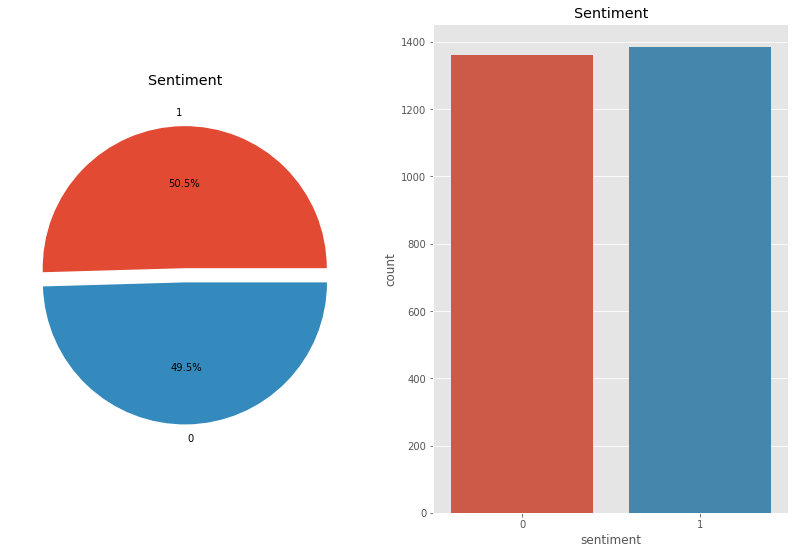

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 9))
df.sentiment.value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%',
    ax=ax[0]
    )
ax[0].set_title('Sentiment')
ax[0].set_ylabel('')

sns.countplot('sentiment', data=df, ax=ax[1])
N, P = df.sentiment.value_counts()
ax[1].set_title('Sentiment')
print('Negative (0)', N)
print('Positive (1)', P)

In [10]:
df['sentiment'].value_counts() / df['sentiment'].shape[0]

1    0.504554
0    0.495446
Name: sentiment, dtype: float64

In [9]:
pd.options.display.max_colwidth = 90
df[['text', 'sentiment']].sample(5, random_state=42)

,text,sentiment
471,Disappointment.. I hate anything that goes in my ear.,0
26,It is a true classic.,1
767,Great product.,1
150,This is a great restaurant at the Mandalay Bay.,1
430,It finds my cell phone right away when I enter the car.,1


## Preparing the data

In [11]:
data, target = df[['text']], df.sentiment

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=.4,
    random_state=0,
    stratify=target,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1647, 1), (1647,), (1098, 1), (1098,))

In [15]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.504554
0    0.495446
Name: sentiment, dtype: float64
1    0.504554
0    0.495446
Name: sentiment, dtype: float64


## Textual features

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# n_grams
vec = CountVectorizer(ngram_range=(1,3), min_df=3, strip_accents='ascii')

x_train = vec.fit_transform(X_train['text'])
x_test = vec.transform(X_test['text'])

X_test.head()

,text
43,"Frozen pucks of disgust, with some of the worst people behind the register."
936,The headset fulfills my requirements so I am happy with my purchase.
396,Great product and price.
957,I really like this product over the Motorola because it is allot clearer on the ear pi...
214,I would highly recommend this.
